[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W2/W2P1_5.ipynb)

In [2]:
import numpy as np
import scipy  
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [96]:
def return_normalized_sample(sample_size = 10):
    sample = np.random.randn(sample_size)
    return (sample**2).sum()

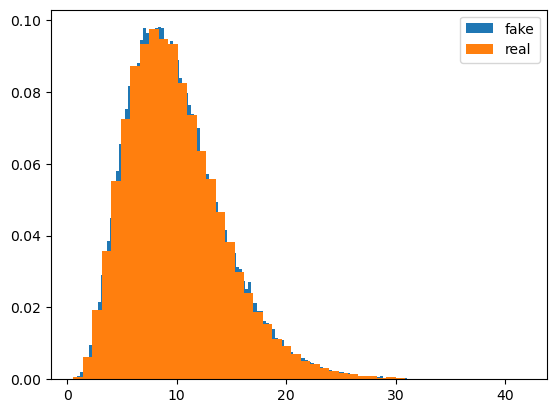

In [100]:
T = np.array([return_normalized_sample(10) for i in range(100000)])
plt.hist(T, bins = 150, density = True, label = "fake")
plt.hist(np.random.chisquare(10, 50000),bins = 45, density = True, label = "real")
plt.legend()
plt.show()

Let's see what happens if the underlying distribution is not normal?
Let's use student-t distribution


In [201]:
def f_fake(sample_size = 11):
    sample = np.random.standard_t(5, size= sample_size)  ### degrees of gfreeedom 
    return (sample**2).sum()

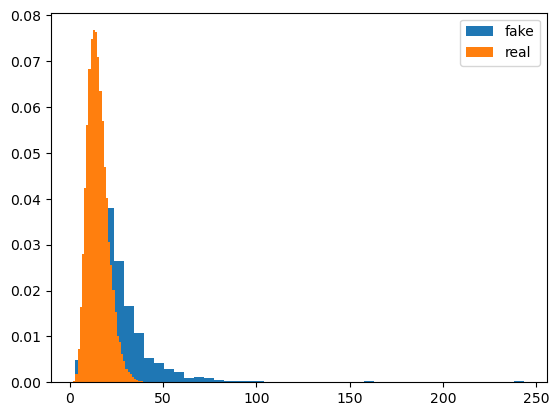

In [203]:
T = [f_fake(15) for i in range(1000)]
plt.hist(T, bins = 45, density = True, label = "fake")
plt.hist(np.random.chisquare(15, 50000),bins = 45, density = True, label = "real")
plt.legend()
plt.show()

$\chi^2 \to N(\mu, \sigma^2)$  as  degree_of_freedoom $\to \infty$  (A consequence of central limit theorem)


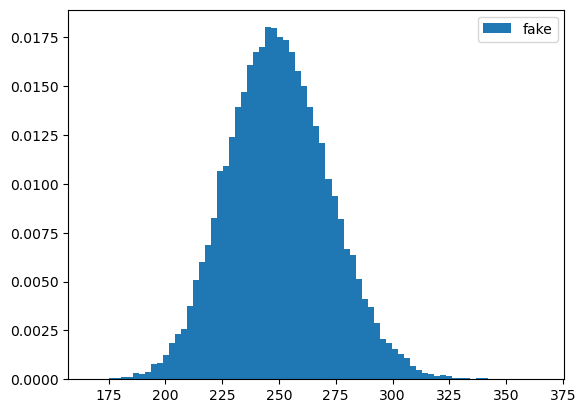

In [48]:
T = np.random.chisquare(250, 50000)  ### degrees of freedom is large here!
plt.hist(T, bins = 75, density = True, label = "fake")
plt.legend()
plt.show()

#Let's talk about kurtosis and skewnees

In [49]:
def return_kurt(size = 10000, size_of_sample = 10000):
  A = np.random.randn(size, size_of_sample)
  return scipy.stats.kurtosis(A, axis = 1, fisher = False)
T = return_kurt()

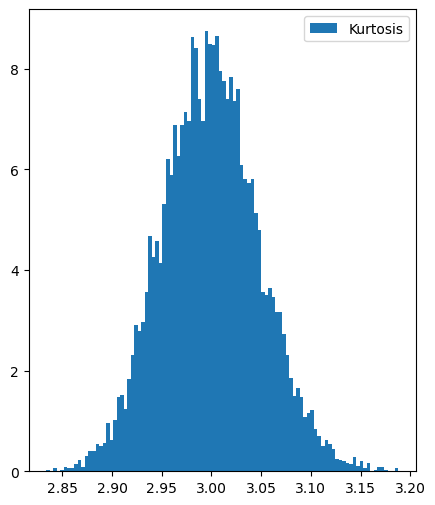

In [55]:
plt.figure(figsize=(5,6))
plt.hist(T, bins = 100, density = True, label = "Kurtosis")
plt.legend()
plt.show()

In [56]:
def return_skewness(size = 10000, size_of_sample = 10000):
  A = np.random.randn(size, size_of_sample)
  return scipy.stats.skew(A, axis = 1)
T = return_skewness()

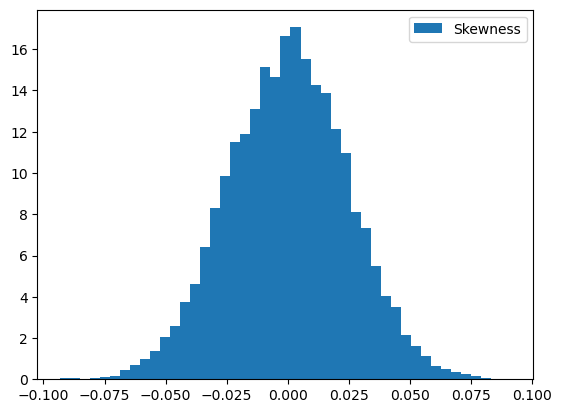

In [57]:
plt.hist(T, bins = 45, density = True, label = "Skewness")
plt.legend()
plt.show()

In [94]:
def jar_ber(size = 100000, size_of_sample = 100):
  A = np.random.randn(size, size_of_sample)
  skewness = scipy.stats.skew(A, axis = 1)
  kurtosis = scipy.stats.kurtosis(A, axis = 1, fisher = False)
  return skewness**2/(6/size_of_sample) + (kurtosis - 3)**2/(24/size_of_sample)

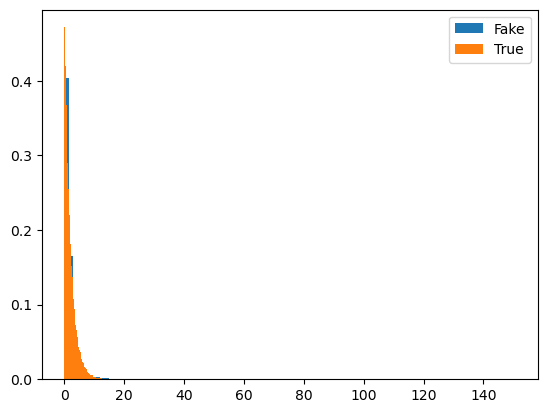

In [98]:
T = np.random.chisquare(2, 100000)  ### degrees of freedom is large here!
jar_bers = jar_ber()
plt.hist(jar_bers, bins = 100, density = True ,label = "Fake")
plt.hist(T, bins = 100, density = True, label = "True")
plt.legend()
plt.show()